In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json

plt.style.use('plot_style.txt')

In [7]:
def process_original_albo_results(result_dir: str,
                                  num_runs: int,
                                  failure_val: float):
    all_results = []
    for run in range(1, num_runs + 1):
        run_file = result_dir + f"run_{run}_results.json"
        with open(run_file, "rb") as fp:
            all_run_data = json.load(fp)
            run_results = all_run_data["prog"]
            i = 0
            while run_results[i] == "Inf":
                i += 1
            if i > 0:
                for j in range(i):
                    run_results[j] = failure_val
            all_results.append(run_results)
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [11]:
original_albo_no_slack_results, original_albo_no_slack_results_mean, original_albo_no_slack_results_median, original_albo_no_slack_results_std = process_original_albo_results("../results/original_albo/lockwood/no_slack/data/", 30, 60000)
original_albo_slack_results, original_albo_slack_results_mean, original_albo_slack_results_median, original_albo_slack_results_std = process_original_albo_results("../results/original_albo/lockwood/slack_optim/data/", 12, 60000)

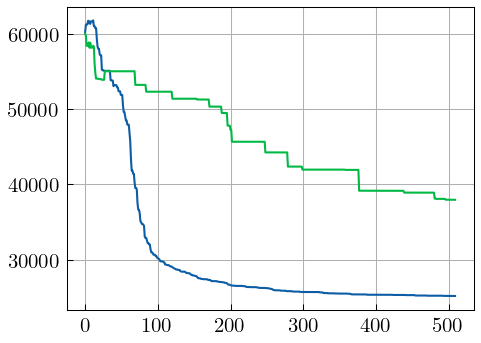

In [12]:
plt.plot(original_albo_no_slack_results_mean)
plt.plot(original_albo_slack_results_mean)